In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pycuda.tools
from pycuda import characterize
import pycuda.driver as cuda
import pycuda.compiler
import pycuda.autoinit
from pycuda import gpuarray as ga
import time
from tqdm import tqdm_notebook as tqdm
np.set_printoptions(suppress=True)
from cuda_tools.utils import *

In [3]:
with open("../kernels/kernel.cu") as f:
    code_str = f.read()
kernel_code = code_str % {"PRINT_I": "%2i", "PRINT_F" : "%6.3f", "PRINT_L": "%llu"}

module = pycuda.compiler.SourceModule(kernel_code, no_extern_c=True, 
   include_dirs=['/home/thomas/Documents/toy-mc/photon_prob/cuda_tools'])

Nobs = 500
oversampling = 1
Nphotons = Nobs * oversampling
radius = 2
d = 20
dN = 20
x = 0
y = 0
z = 0
pa = 100
ps = 50
seed = 666
Ndoms = np.uint32(pow((d/dN)*2+1, 3) - 1)

t1 = time.time()
datahits = np.zeros(Ndoms, dtype=np.int32)
datatimes = np.zeros(Nobs, dtype=np.float32)
hits_obs, times_obs, timesbinned_obs, positions_obs = simulate_photons(module, Nobs, 1, 1, datahits, datatimes, radius, d, dN, x, y, z, pa, ps, seed=seed)
print "Simulation time: %s" % (time.time() - t1)

Nruns = 1000
print "Simulating %s photons %s times" % (Nphotons, Nruns)
print "d: %s, dN: %s, Ndoms: %s " % (d, dN, Ndoms)

t1 = time.time()
datahits = np.zeros(Ndoms, dtype=np.int32)
datatimes = np.zeros(Nphotons, dtype=np.float32)
hits, times, timesbinned, positions = simulate_photons(module, Nphotons, Nruns, oversampling, datahits, datatimes, radius, d, dN, x, y, z, pa, ps, seed=np.random.randint(1234567))
print "Simulation time: %s" % (time.time() - t1)

mu = hits/oversampling

Total Threads: 500
t2-t1:  0.0567197799683
t3-t2:  0.0579261779785
t4-t3:  0.0570559501648
end-start 0.00115609169006
sumHits:  34

Simulation time: 0.174239873886
Simulating 500 photons 1000 times
d: 20, dN: 20, Ndoms: 26 
Total Threads: 500000
t2-t1:  0.000293970108032
t3-t2:  0.000234842300415
t4-t3:  3.91006469727e-05
end-start 0.143967151642
sumHits:  19143

Simulation time: 0.152983188629


In [4]:
times = []
Ns = []

# NphotonTrials = [5, 10, 50, 100, 500, 1000, 2000, 5000, 10000, 20000]
NphotonTrials = np.logspace(1, 7, num=20).astype(int)
Nruns = 1
oversampling = 1
for Nphotons in NphotonTrials:
    datahits = np.zeros(Ndoms, dtype=np.int32)
    datatimes = np.zeros(Nphotons, dtype=np.float32)

    tstart = time.time()
    h, t, tb, pos = simulate_photons(module, Nphotons, Nruns, oversampling, datahits, datatimes, radius, d, dN, x, y, z, pa, ps, seed=np.random.randint(1234567))
    tend = time.time()

    times.append(tend-tstart)
    Ns.append(Nphotons)

Total Threads: 10
t2-t1:  0.00037407875061
t3-t2:  6.48498535156e-05
t4-t3:  4.31537628174e-05
end-start 0.00152182579041
sumHits:  1

Total Threads: 20
t2-t1:  0.000257015228271
t3-t2:  5.69820404053e-05
t4-t3:  4.29153442383e-05
end-start 0.00773000717163
sumHits:  1

Total Threads: 42
t2-t1:  0.000281095504761
t3-t2:  5.98430633545e-05
t4-t3:  4.19616699219e-05
end-start 0.000743865966797
sumHits:  1

Total Threads: 88
t2-t1:  0.000233888626099
t3-t2:  5.41210174561e-05
t4-t3:  4.19616699219e-05
end-start 0.00105500221252
sumHits:  4

Total Threads: 183
t2-t1:  0.000224828720093
t3-t2:  5.50746917725e-05
t4-t3:  4.41074371338e-05
end-start 0.000891923904419
sumHits:  7

Total Threads: 379
t2-t1:  0.000225067138672
t3-t2:  5.29289245605e-05
t4-t3:  4.10079956055e-05
end-start 0.000911951065063
sumHits:  22

Total Threads: 784
t2-t1:  0.000258922576904
t3-t2:  5.69820404053e-05
t4-t3:  4.10079956055e-05
end-start 0.00117182731628
sumHits:  25

Total Threads: 1623
t2-t1:  0.00038099288

In [5]:
import matplotlib as mpl
mpl.rcParams["xtick.labelsize"] = 15
mpl.rcParams["ytick.labelsize"] = 15
mpl.rcParams["axes.labelsize"] = 20
mpl.rcParams["legend.fontsize"] = 15

Text(0,0.5,'Time [s]')

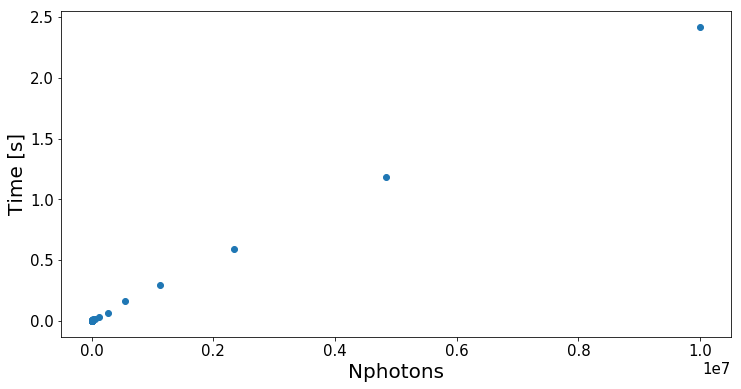

In [6]:
plt.figure(figsize=(12,6))
plt.scatter(Ns, times)

plt.xlabel("Nphotons")
plt.ylabel("Time [s]")

In [83]:
Nobs = 2000
oversampling = 1
Nphotons = Nobs * oversampling
radius = 2
d = 20
dN = 20
x = 0
y = 0
z = 0
pa = 100
ps = 20
Ndoms = np.uint32(pow((d/dN)*2+1, 3) - 1)

pInit = [0.0, 0.0]


Nruns = 5000

dom_hits, t, tb, pos = simulate_photons(module, Nphotons, Nruns, oversampling, datahits, datatimes, radius, 
                                     d, dN, x, y, z, pa, ps, seed=np.random.randint(1234567))


Total Threads: 10000000
t2-t1:  0.00135803222656
t3-t2:  0.000332832336426
t4-t3:  6.79492950439e-05
end-start 4.9483590126
sumHits:  491474



In [84]:
dN = 20
d = 20

xs = np.arange(-d, d+0.01, dN)
ys = np.arange(-d, d+0.01, dN)
zs = np.arange(-d, d+0.01, dN)
doms = []
c = 0
for x in xs:
    for y in ys:
        for z in zs:
            if x != 0 or y != 0 or z != 0:
                doms.append([x, y, z])
# doms

In [85]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.special import factorial

In [86]:
def poisson(k, l):
    return (np.exp(-l)*(l**k)) / factorial(k)

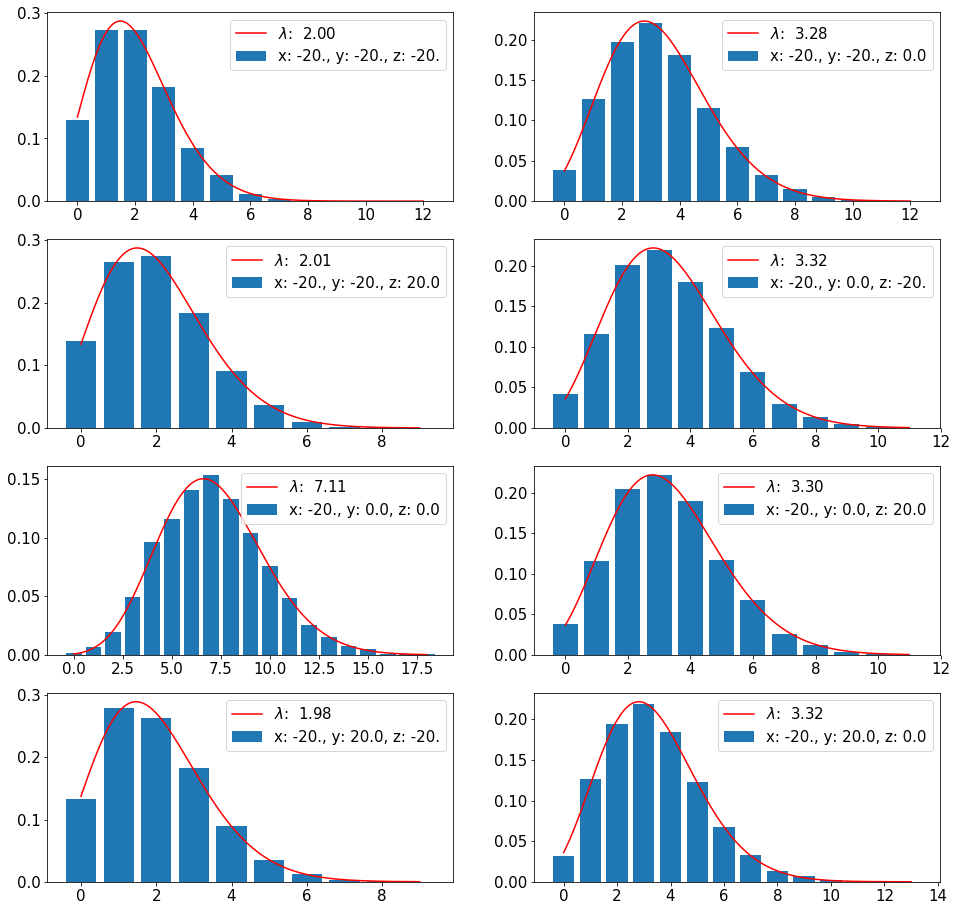

In [87]:
fig, axes = plt.subplots(4,2, figsize=(16,16))
axes = axes.flatten()
dom_hits = np.squeeze(dom_hits)
for i, ax in enumerate(axes):
    d = dom_hits[:,i]
    dom_pos = doms[i]
    u, c = np.unique(d, return_counts=True)
    c = c.astype(float)
    c /= sum(c)
    popt, pcov = curve_fit(poisson, u, c)
    
    xmin, xmax = min(u), max(u)
    x = np.linspace(xmin, xmax, 1000)
    y = poisson(x, popt)
    
    ax.plot(x, y, color="r", zorder=3, label=r"$\lambda$: %5.4s" % popt[0])
    ax.bar(u, c, label="x: %2.4s, y: %2.4s, z: %2.4s" % tuple(dom_pos))
    ax.legend()

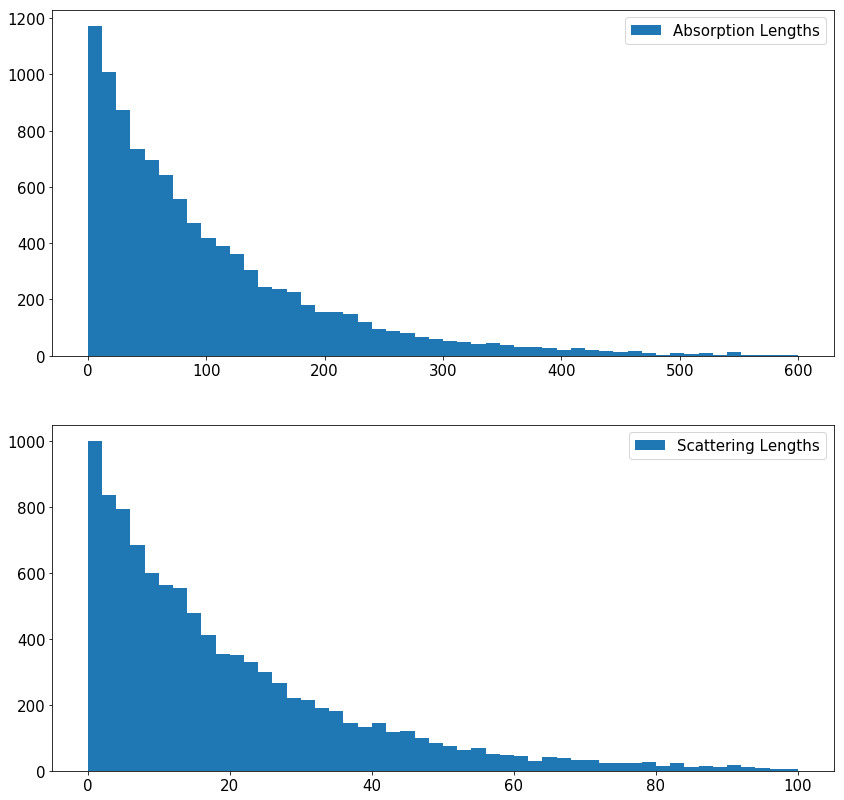

In [99]:
pa = 100
ps = 20
ranNum = np.random.rand(10000)
Pabs = -np.log(ranNum)*pa
Pscat = -np.log(ranNum)*ps

ra = (0, 600)
rs = (0, 100)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 14))
ax1.hist(Pabs, bins=50, range=ra, label="Absorption Lengths")
ax2.hist(Pscat, bins=50, range=rs, label="Scattering Lengths")
ax1.legend()
ax2.legend()

In [95]:
def exponential(x, l):
    return l*np.exp(-l*x)

In [96]:
PA = 0.01
Pabs = []
for i in range(10000):
    c = 0
    while PA < np.random.rand():
        c += 1

    Pabs.append(c)
Pabs = np.array(Pabs)
u, c = np.unique(Pabs, return_counts=True)
c = c.astype(float)
c /= sum(c)
pabs, pcov = curve_fit(exponential, u, c)



Pscat = []
PS = 0.05
for i in range(10000):
    c = 0
    while PS < np.random.rand():
        c += 1

    Pscat.append(c)
Pscat = np.array(Pscat)

u, c = np.unique(Pscat, return_counts=True)
c = c.astype(float)
c /= sum(c)
pscat, pcov = curve_fit(exponential, u, c)

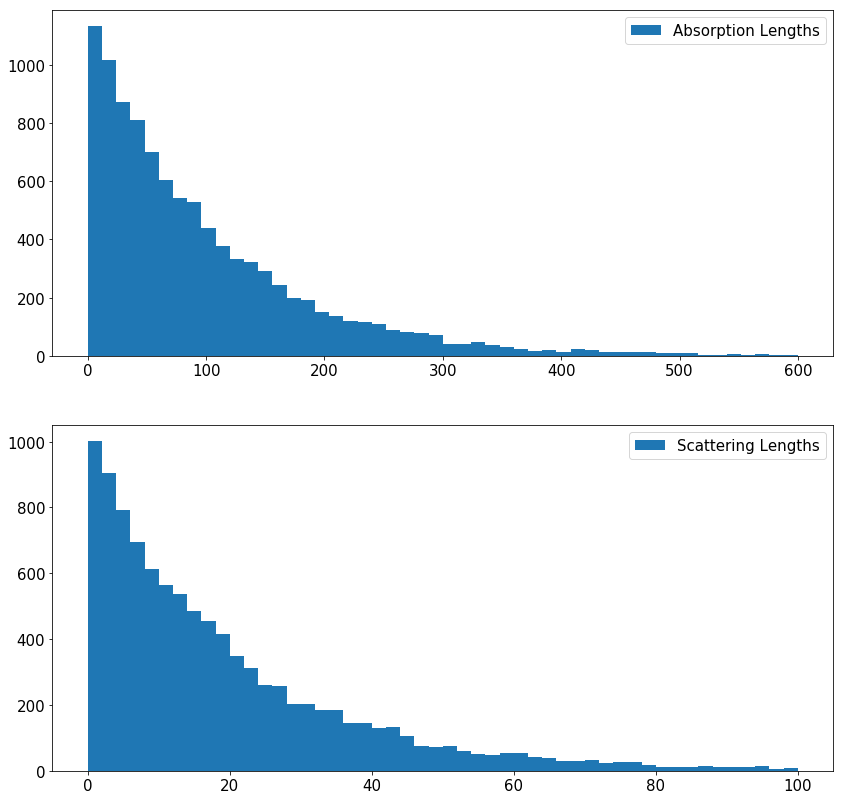

In [98]:
ra = (0, 600)
rs = (0, 100)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 14))
ax1.hist(Pabs, bins=50, range=ra, label="Absorption Lengths")
ax2.hist(Pscat, bins=50, range=rs, label="Scattering Lengths")
ax1.legend()
ax2.legend()